multiple linear regression model

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print("imported")

imported


In [50]:
dataset = pd.read_csv('startups_50.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


we've got 5 columns:
1. **R&D Spend**: how much a company invests in developing new things, like products, services, or technologies.
2. **Administration**: costs of running the company itself, like keeping things organized and managing staff.
3. **Marketing Spend**: This shows how much a company spends on promoting its products or services to get customers.
4. **State**: which of the three states (California, New York, or Florida) the company is located in.
5. **Profit**: how much the company makes after all its expenses are paid. *this is going to be our dependent variable*

*information about each column*

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [52]:
dataset.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


*checking for null values*

In [53]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# exploratory data analysis

*R&D vs profit*

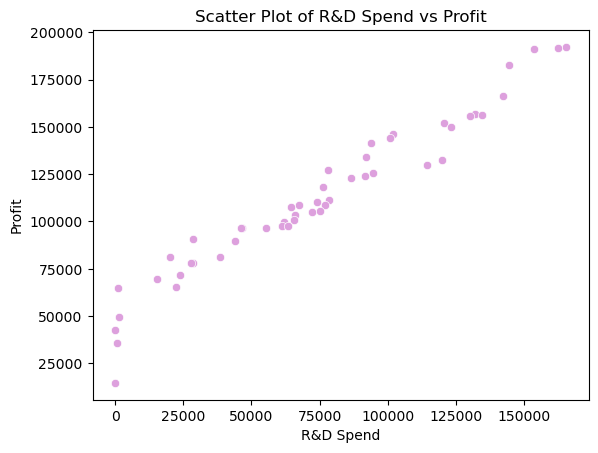

In [54]:
sns.scatterplot(data=dataset, x='R&D Spend', y='Profit', color="plum")

plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Scatter Plot of R&D Spend vs Profit')

plt.show()

In [55]:
# discovering outliers with mathematical function
Q1 = dataset['R&D Spend'].quantile(0.25)
Q3 = dataset['R&D Spend'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range: {IQR}\n")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}\n")

outliers = dataset[(dataset['R&D Spend'] < lower_bound) | (dataset['R&D Spend'] > upper_bound)]

print("The outliers in R&D are: ")
outliers


Interquartile Range: 61666.43

Lower Bound: -52563.275
Upper Bound: 194102.445

The outliers in R&D are: 


,R&D Spend,Administration,Marketing Spend,State,Profit


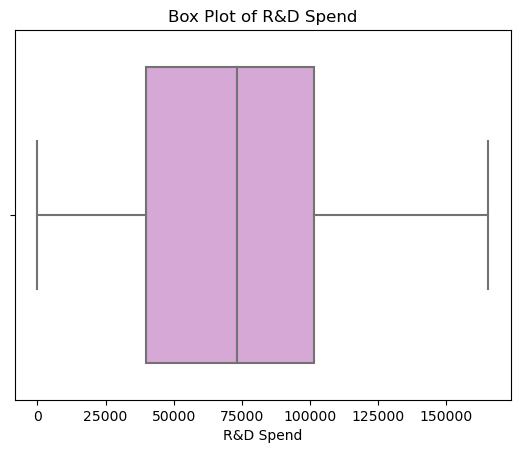

In [56]:
# box plot
sns.boxplot(data=dataset, x='R&D Spend', color="plum")

plt.xlabel('R&D Spend')
plt.title('Box Plot of R&D Spend')

plt.show()

according to the above calculation, we can see that there are no outliers in the data

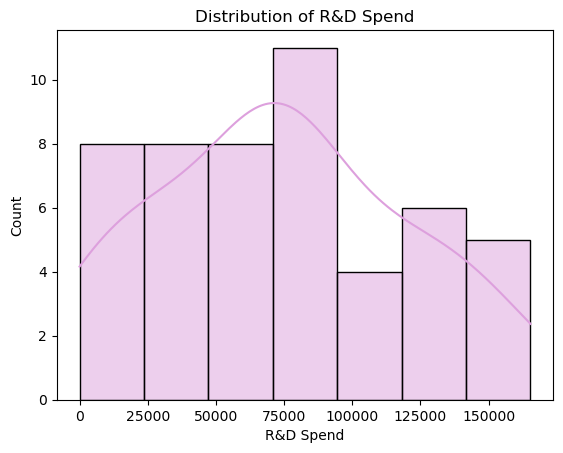

In [57]:
# distribution of the data
sns.histplot(dataset['R&D Spend'], kde=True, color='plum')
plt.title('Distribution of R&D Spend')
plt.show()

from the plot it is clear that the R&D Spend data is normally distributed


*administration vs profit*

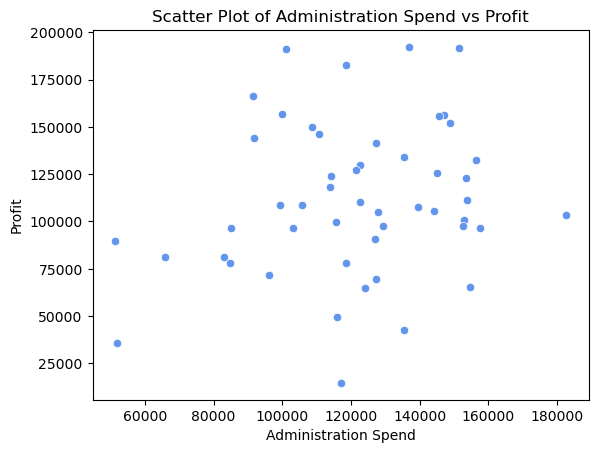

In [58]:
# scatter plot of Administration Spend vs Profit
sns.scatterplot(data=dataset, x='Administration', y='Profit', color="cornflowerblue")

plt.xlabel('Administration Spend')
plt.ylabel('Profit')
plt.title('Scatter Plot of Administration Spend vs Profit')

plt.show()

it's hard to determine any sort of correlation between the two just from the scatter plot

In [59]:
# calculating the outliers
Q1 = dataset['Administration'].quantile(0.25)
Q3 = dataset['Administration'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range: {IQR}\n")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}\n")

outliers = dataset[(dataset['Administration'] < lower_bound) | (dataset['Administration'] > upper_bound)]

print("The outliers in Administration are: ")
outliers


Interquartile Range: 41111.30499999999

Lower Bound: 42063.91750000001
Upper Bound: 206509.13749999998

The outliers in Administration are: 


,R&D Spend,Administration,Marketing Spend,State,Profit


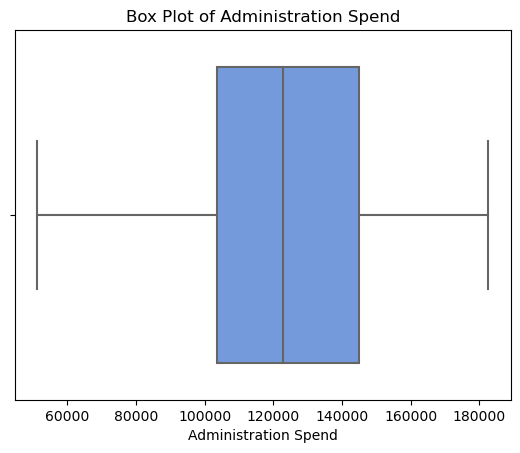

In [60]:
# box plot
sns.boxplot(data=dataset, x='Administration', color="cornflowerblue")

plt.xlabel('Administration Spend')
plt.title('Box Plot of Administration Spend')

plt.show()


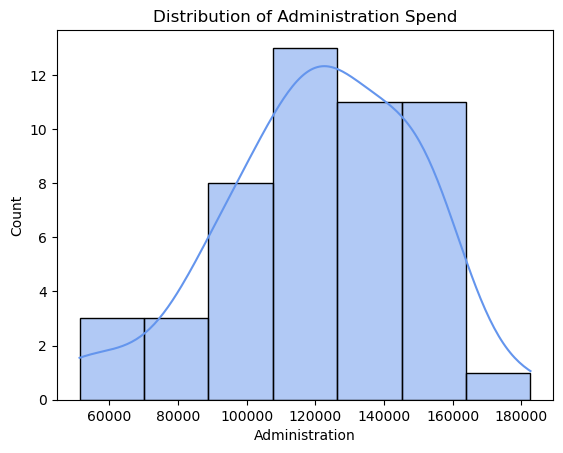

In [61]:
# distribution of the data
sns.histplot(dataset['Administration'], kde=True, color='cornflowerblue')
plt.title('Distribution of Administration Spend')
plt.show()

from the plot it is clear that the Administration data is normally distributed

*marekting spend vs profit*

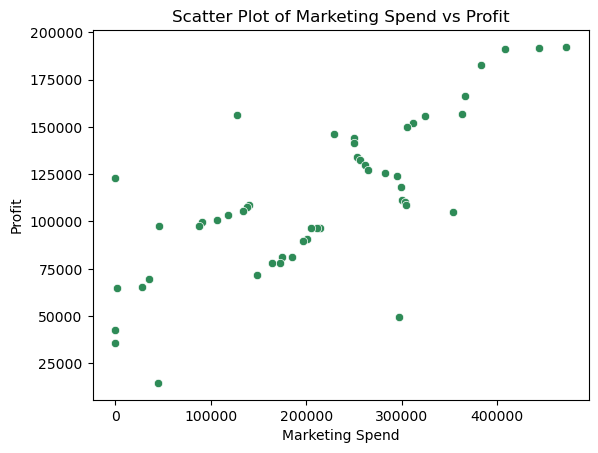

In [62]:
# scatter plot of Marketing Spend vs Profit
sns.scatterplot(data=dataset, x='Marketing Spend', y='Profit', color="seagreen")

plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Scatter Plot of Marketing Spend vs Profit')

plt.show()

there is clearly a positive correlation between marketing spend and profit

In [63]:
# calculating the outliers
Q1 = dataset['Marketing Spend'].quantile(0.25)
Q3 = dataset['Marketing Spend'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range: {IQR}\n")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}\n")

outliers = dataset[(dataset['Marketing Spend'] < lower_bound) | (dataset['Marketing Spend'] > upper_bound)]

print("The outliers in Marketing are: ")
outliers

Interquartile Range: 170168.95249999996

Lower Bound: -125953.29624999993
Upper Bound: 554722.5137499999

The outliers in Marketing are: 


,R&D Spend,Administration,Marketing Spend,State,Profit


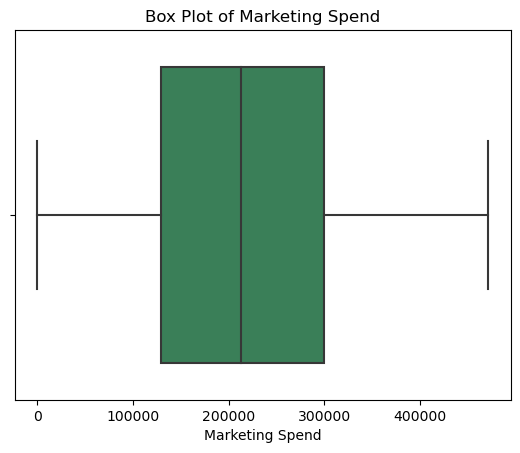

In [64]:
# box plot
sns.boxplot(data=dataset, x='Marketing Spend', color="seagreen")

plt.xlabel('Marketing Spend')
plt.title('Box Plot of Marketing Spend')

plt.show()

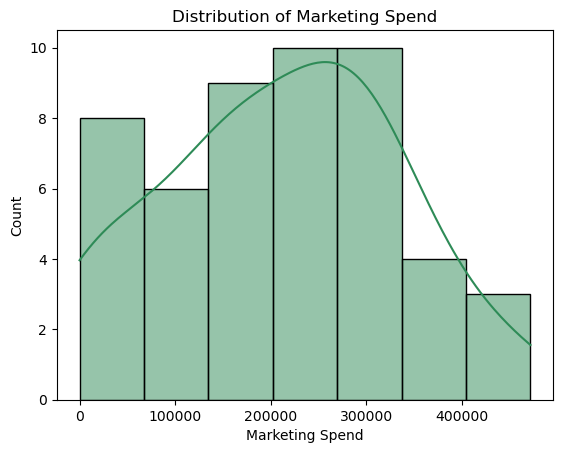

In [65]:
# distribution of the data
sns.histplot(dataset['Marketing Spend'], kde=True, color='seagreen')
plt.title('Distribution of Marketing Spend')

plt.show()

*state vs profit*

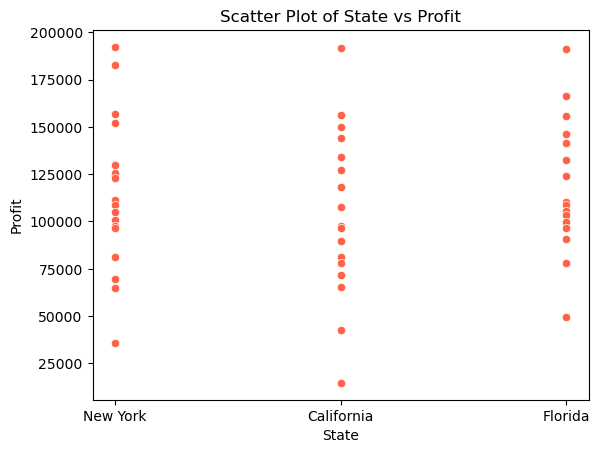

In [66]:
# scatter plot of State vs Profit
sns.scatterplot(data=dataset, x='State', y='Profit', color="tomato")

plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Scatter Plot of State vs Profit')

plt.show()

c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


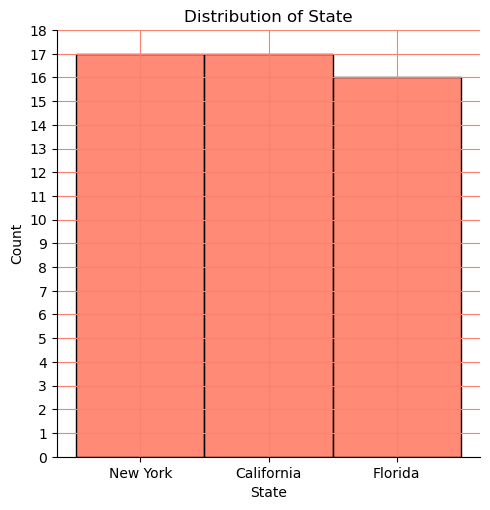

In [89]:
# distribution plot
sns.displot(dataset['State'], color='tomato')
plt.ylim(0,18)
plt.yticks(np.arange(0, 19, 1))
plt.grid(True, color="salmon")
plt.title('Distribution of State')

plt.show()

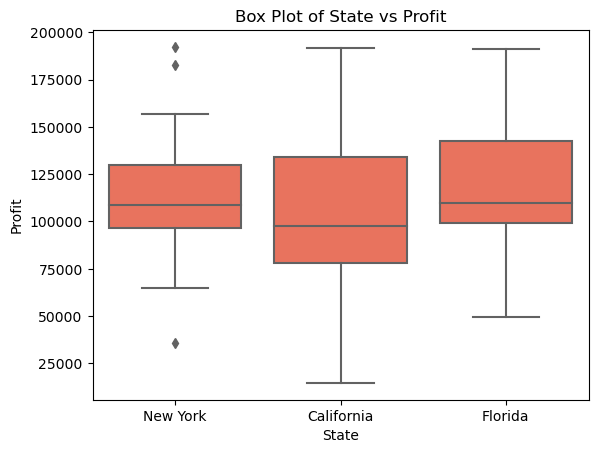

In [67]:
# box plot
sns.boxplot(data=dataset, x='State', y='Profit', color="tomato")

plt.xlabel('State')
plt.ylabel('Profit')

plt.title('Box Plot of State vs Profit')

plt.show()

*taking a look at the profit column*

In [90]:
# calculating the outliers
Q1 = dataset['Profit'].quantile(0.25)
Q3 = dataset['Profit'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range: {IQR}\n")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}\n")

outliers = dataset[(dataset['Profit'] < lower_bound) | (dataset['Profit'] > upper_bound)]

print("The outliers in Profit are: ")
outliers


Interquartile Range: 49627.07499999998

Lower Bound: 15698.290000000023
Upper Bound: 214206.58999999997

The outliers in Profit are: 


,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


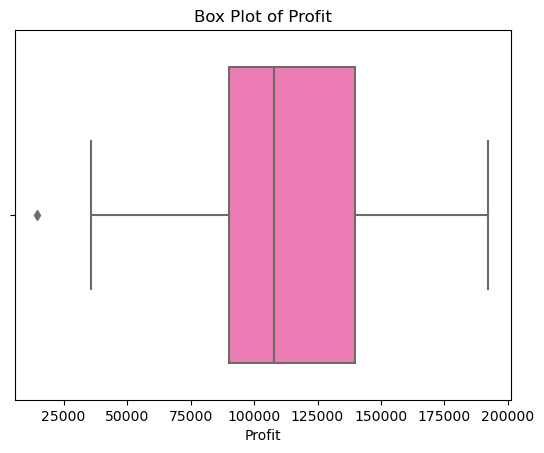

In [44]:
# box plot
sns.boxplot(data=dataset, x='Profit', color="hotpink")

plt.xlabel('Profit')
plt.title('Box Plot of Profit')

plt.show()



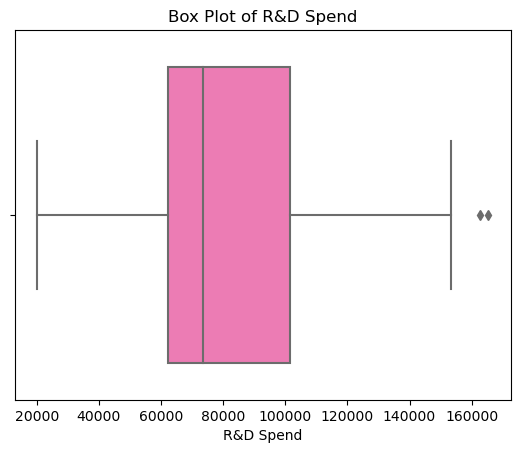

In [92]:
# replacing the outlier with median
median = dataset['R&D Spend'].median()
dataset['R&D Spend'] = np.where(dataset['R&D Spend'] > upper_bound, median, dataset['R&D Spend'])
dataset['R&D Spend'] = np.where(dataset['R&D Spend'] < lower_bound, median, dataset['R&D Spend'])

# box plot
sns.boxplot(data=dataset, x='R&D Spend', color="hotpink")

plt.xlabel('R&D Spend')
plt.title('Box Plot of R&D Spend')

plt.show()

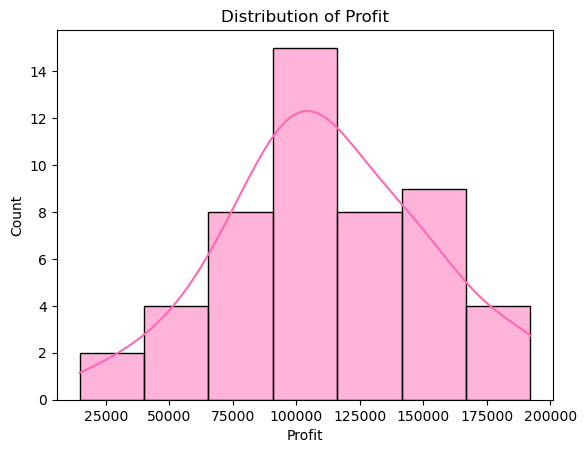

In [93]:
# distribution of the data
sns.histplot(dataset['Profit'], kde=True, color='hotpink')
plt.title('Distribution of Profit')
plt.show()

# data preprocessing


*converting the state column with categorical values to numerical values*

In [91]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

**labelencoder**: it converts the categorical data, or text data, into the number format which our model can understand <br>
**onehotencoder**: it takes the column which has categorical data, which is the output of labelencoder, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

In [95]:
le = LabelEncoder()
dataset['State'] = le.fit_transform(dataset['State'])
ohe = OneHotEncoder()
state = ohe.fit_transform(dataset['State'].values.reshape(-1, 1)).toarray()
state = pd.DataFrame(state)
dataset = pd.concat([dataset, state], axis=1)
dataset = dataset.drop(['State'], axis=1)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,0,1,2
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [100]:
# dropping one of the categorical variables to avoid the dummy variable trap
dataset = dataset.drop([2], axis=1)

In [101]:
# separating dependent and independent variables
X = dataset.drop(['Profit'], axis=1)
Y = dataset['Profit']

# converting both to numpy array
X = X.values
Y = Y.values

In [102]:
print(f"X: {X}")

X: [[1.6534920e+05 1.3689780e+05 4.7178410e+05 0.0000000e+00 0.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 1.0000000e+00 0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 0.0000000e+00 1.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 0.0000000e+00 0.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 0.0000000e+00 1.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 0.0000000e+00 0.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 1.0000000e+00 0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 0.0000000e+00 1.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 0.0000000e+00 0.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 1.0000000e+00 0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 0.0000000e+00 1.0000000e+00]
 [1.0067196e+05 9.1790610e+04 2.4974455e+05 1.0000000e+00 0.0000000e+00]
 [9.3863750e+04 1.2732038e+05 2.4983944e+05 0.0000000e+00 1.0000000e+00]
 [9.1992390e+04 1.3549507e+05 2.5266493e+05 1.00

In [103]:
print(f"Y: {Y}")

Y: [192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [105]:
# split into training and testing
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=26)

# multiple linear regression

In [104]:
from sklearn.linear_model import LinearRegression

In [131]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [132]:
# predct Y-test
Y_pred_LR = lr.predict(X_test)

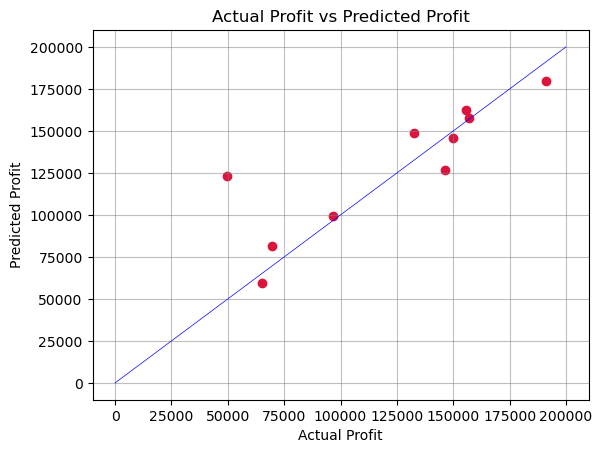

In [134]:
# scatter plot for each dependent variable againt predcited variable
plt.scatter(Y_test, Y_pred_LR, color='crimson')
# straight line through
plt.plot([0, 200000], [0, 200000], color='blue', linewidth=0.5)
plt.xlabel('Actual Profit')
plt.grid(True, color="gray", alpha=0.5)
plt.ylabel('Predicted Profit')
plt.title('Actual Profit vs Predicted Profit')
plt.show()

In [140]:
# r2 score
from sklearn.metrics import r2_score

r2_score(Y_test, Y_pred_LR)

0.6845650151041489

# OLS regression

In [135]:
import statsmodels.api as sm
X
X_opt = X[:,[0,1,2,3,4]]
X_opt
regressor_OLS = sm.OLS(endog=Y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              325.0
Date:                Thu, 02 May 2024   Prob (F-statistic):                    4.08e-34
Time:                        09:31:47   Log-Likelihood:                         -564.91
No. Observations:                  50   AIC:                                      1140.
Df Residuals:                      45   BIC:                                      1149.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5723      0.104      5.491      0.000       0.362       0.782
x2             0.2494      0.064      3.886      0.000       0.120       0.379
x3             0.1515      0.031      4.914      0.000       0.089       0.214
x4          4215.9485   6862.582      0.614      0.542   -9606.001     1.8e+04
x5          2173.6938   7204.757      0.302      0.764   -1.23e+04    1.67e+04
==============================================================================
Omnibus:                       27.488   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.799
Skew:                          -1.642   Prob(JB):                     2.08e-12
Kurtosis:                       6.878   Cond. No.                     8.17e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# decision tree regression


In [143]:
# decision tree for regression
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(random_state=26)
DT.fit(X_train, Y_train)


DecisionTreeRegressor(random_state=26)

In [144]:
# predict Y-test
Y_pred_DT = DT.predict(X_test)



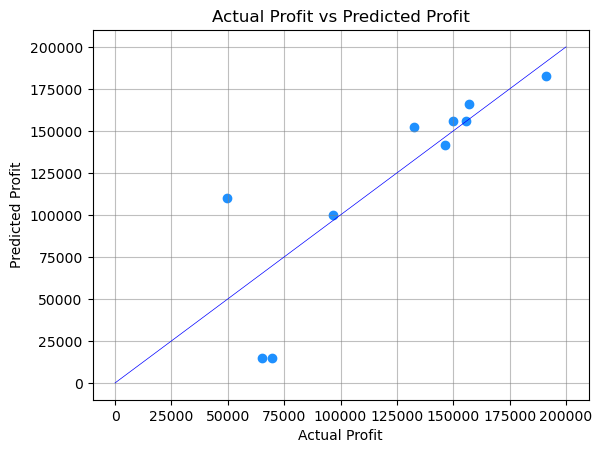

In [145]:

plt.scatter(Y_test, Y_pred_DT, color='dodgerblue')

plt.plot([0, 200000], [0, 200000], color='blue', linewidth=0.5)
plt.xlabel('Actual Profit')
plt.grid(True, color="gray", alpha=0.5)
plt.ylabel('Predicted Profit')
plt.title('Actual Profit vs Predicted Profit')
plt.show()

In [146]:
# accuracy
from sklearn.metrics import r2_score

r2_score(Y_test, Y_pred_DT)

0.5158573392829623

# random forest regression

In [151]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=10, random_state=26)
RF.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=26)

In [152]:
# predict Y-test
Y_pred_RF = RF.predict(X_test)

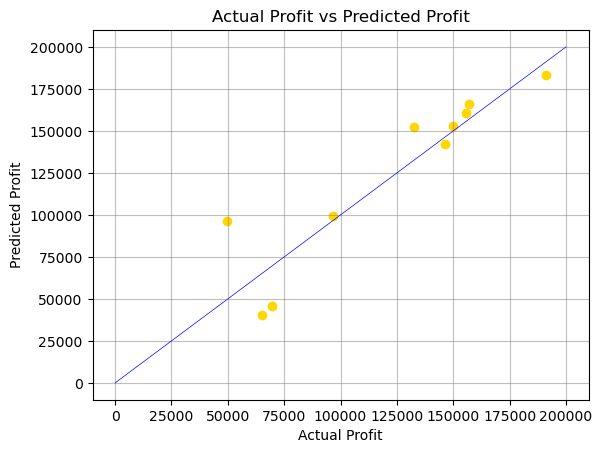

In [153]:
# scatter plot
plt.scatter(Y_test, Y_pred_RF, color='gold')
plt.plot([0, 200000], [0, 200000], color='blue', linewidth=0.5)
plt.xlabel('Actual Profit')
plt.grid(True, color="gray", alpha=0.5)
plt.ylabel('Predicted Profit')
plt.title('Actual Profit vs Predicted Profit')
plt.show()

In [154]:
# r2 score
r2_score(Y_test, Y_pred_RF)

0.8062811504044773

# SVM regression

In [163]:
# svm regression
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, Y_train)

SVR()

In [164]:
# predict Y-test
Y_pred_SVR = svr.predict(X_test)

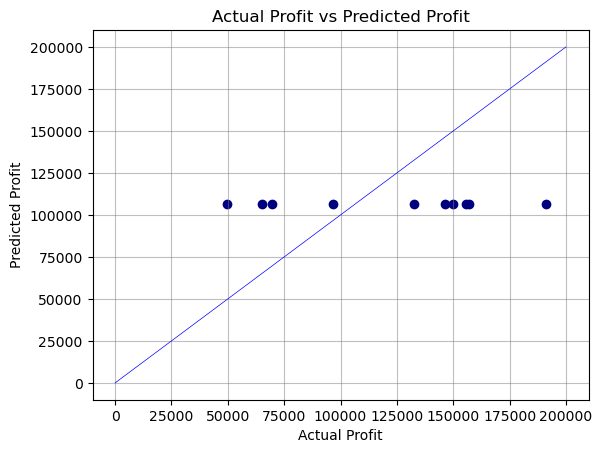

In [165]:
# scatter plot
plt.scatter(Y_test, Y_pred_SVR, color='navy')
plt.plot([0, 200000], [0, 200000], color='blue', linewidth=0.5)
plt.xlabel('Actual Profit')
plt.grid(True, color="gray", alpha=0.5)
plt.ylabel('Predicted Profit')
plt.title('Actual Profit vs Predicted Profit')
plt.show()

In [168]:
# r2 score
r2_score(Y_test, Y_pred_SVR)

-0.10660066533987567

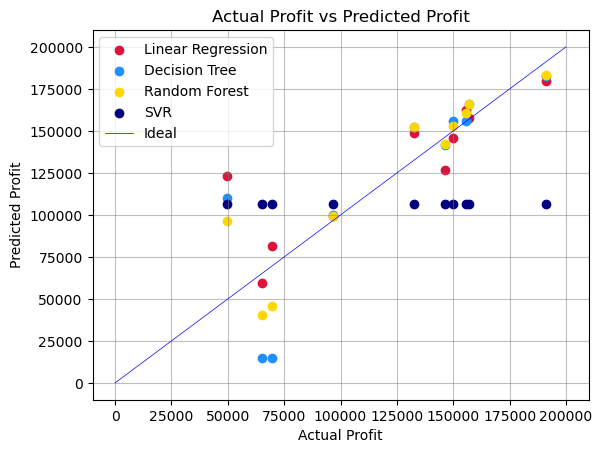

In [167]:
plt.scatter(Y_test, Y_pred_LR, color='crimson')
plt.scatter(Y_test, Y_pred_DT, color='dodgerblue')
plt.scatter(Y_test, Y_pred_RF, color='gold')
plt.scatter(Y_test, Y_pred_SVR, color='navy')
plt.plot([0, 200000], [0, 200000], color='blue', linewidth=0.5)
plt.xlabel('Actual Profit')
plt.grid(True, color="gray", alpha=0.5)
plt.ylabel('Predicted Profit')
plt.legend(
    ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'Ideal'],
    loc='best'
)
plt.title('Actual Profit vs Predicted Profit')
plt.show()

In [169]:
# comapring scores of all 3
print("R2 Scores:")
print(f"Linear Regression: {r2_score(Y_test, Y_pred_LR)}")
print(f"Decision Tree: {r2_score(Y_test, Y_pred_DT)}")
print(f"Random Forest: {r2_score(Y_test, Y_pred_RF)}")
print(f"SVR: {r2_score(Y_test, Y_pred_SVR)}")

# MSE 
from sklearn.metrics import mean_squared_error
print()
print("Mean Squared Error:")
print(f"Linear Regression: {mean_squared_error(Y_test, Y_pred_LR)}")
print(f"Decision Tree: {mean_squared_error(Y_test, Y_pred_DT)}")
print(f"Random Forest: {mean_squared_error(Y_test, Y_pred_RF)}")
print(f"SVR: {mean_squared_error(Y_test, Y_pred_SVR)}")

R2 Scores:
Linear Regression: 0.6845650151041489
Decision Tree: 0.5158573392829623
Random Forest: 0.8062811504044773
SVR: -0.10660066533987567

Mean Squared Error:
Linear Regression: 644789444.3228613
Decision Tree: 989649506.6322501
Random Forest: 395986099.72448844
SVR: 2262033262.820848
